In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
line = np.linspace(start=0, stop=99, num=100, dtype=int)
y_data = np.empty(shape=(len(line)))
for x in line:
    n = x + np.random.normal(loc=0, scale=5)
    if x > 30 and x < 60:
        n = 2*x + np.random.normal(loc=0, scale=5) + 100
    y_data[x] = n

line = line.reshape(100,1)
y_data = y_data.reshape(100,1)

(100, 1)
(100, 1)


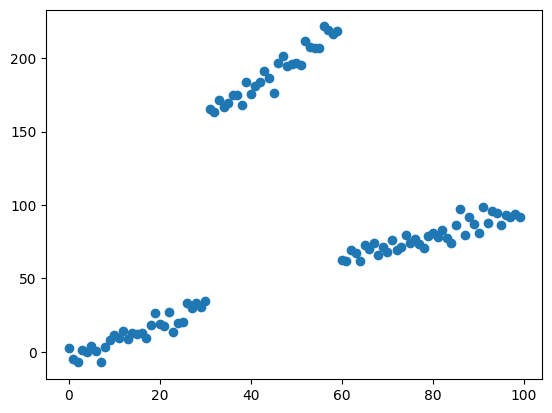

In [22]:
print(line.shape)
print(y_data.shape)
plt.scatter(line, y_data)

final wth: 0.8


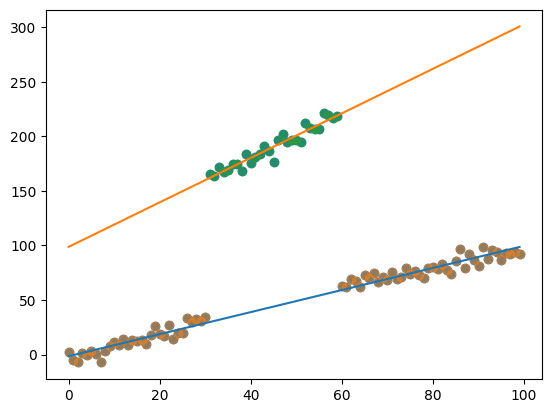

In [25]:
def add_bias(X):
    N = X.shape[0]
    return np.concatenate((np.ones((N, 1)), X), axis=1)

def mxlreg(x, y, K, wth, p, n, T1):
    if len(x) != len(y):
        print("x and y must have the same length")
        return
    beta = np.random.rand(K,1)
    betaPhaseList = []
    SprimList = []
    S1 = np.arange(len(x))
    x = add_bias(x)
    k = 1
    while k <= K:
        beta = np.random.random(size=(2,1))
        for t in range(T1):
        
            r = np.array(np.abs(x[S1] * beta.T - y[S1]))
            w = np.array([1/(1+(n*r[i]**2 )/ np.average(r)**2) for i,_ in enumerate(S1)])
            diagW = np.diag(w[:,1].reshape(-1))


            beta1 = np.linalg.inv((x[S1].T@ diagW)@x[S1])
            beta2 = x[S1].T@ diagW@ y[S1]
            beta = beta1 @ beta2
            #beta = (np.linalg.inv((x[S1].T@ diagW)@x[S1]))@x[S1].T@ diagW@ y[S1]
        Sprim = np.array([index for i,index in enumerate(S1) if p * sum(w[i]) > wth])
        S1 = np.array([index for i,index in enumerate(S1) if sum(w[i]) <= wth])
        #TODO: Implement the recurrence step and the dynamic k step
        # if k < K and len(S1) < len(Sprim): #Check if we have enough data to continue
            # print(wth)
            # k = 1
            # wth = wth + 0.01
            # # if wth > 1:
            # #     wth = 1
            # beta = np.random.rand(K,1)
            # S1 = np.arange(len(x))
            # betaPhaseList = []
            # continue
        
        betaPhase = (np.linalg.inv(x[Sprim].T@x[Sprim]))@x[Sprim].T@y[Sprim]
        SprimList.append(Sprim)
        betaPhaseList.append(betaPhase)
        k+=1
    print(f"final wth: {wth}")    
    return betaPhaseList, SprimList



betas, SprimList = mxlreg(line, y_data, 2, 0.8, 1, 1, 10)
plt.scatter(line, y_data)
for i in range(len(SprimList)):
    
    plt.scatter(line[SprimList[i]], y_data[SprimList[i]], alpha=0.5)
    plt.plot(line, line * betas[i][1] + betas[i][0])



# Tof data with 10% data

In [26]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import numpy as np
import matplotlib.pyplot as plt
from utils import lists
from tqdm import tqdm
from scipy.stats import norm
import scipy
import matplotlib.cm as cm

FILE_PATH = '../data/tof_erda/raw/I_36MeV_SH2-12_S18.lst'
chn = [2048,2048]
header, events, timing = lists.lstRead(FILE_PATH)
coin = [True, True, False, False, False, False, False, False]
zdrop = True
data = np.array(lists.getCoins(events,coin,zdrop))

def Phi(x, exponents=[1]):
    phi = np.empty((x.shape[0], len(exponents)))
    for i, b in enumerate(exponents):
        if b < 0:
            phi[:,i] = (1/np.power(x, -b).flatten())
        else:
            phi[:,i] = np.power(x, b).flatten()
    return phi

def sample_fraction(X, phi, y, fraction=0.1, random_seed=None):
    if not (0 < fraction <= 1):
        raise ValueError("Fraction must be between 0 and 1.")
    
    # Set random seed for reproducibility if provided
    if random_seed is not None:
        np.random.seed(random_seed)
    
    # Calculate the number of samples
    n_samples = int(len(X) * fraction)
    
    # Randomly select indices to sample
    sampled_indices = np.random.choice(len(X), n_samples, replace=False)
    
    # Return the sampled data
    X_sampled = X[sampled_indices]
    y_sampled = y[sampled_indices]
    phi_sampled = phi[sampled_indices]
    return X_sampled, phi_sampled, y_sampled
X = np.array(data[0]).astype(int)
y = data[1].astype(int).reshape((-1,1))
phi = Phi(X, [-1/2])
# Sample a fraction of data (will take too much time / memory otherwise)
X, phi, y = sample_fraction(X, phi, y, fraction=0.1)
X = X.reshape(-1,1)


final wth: 0.98


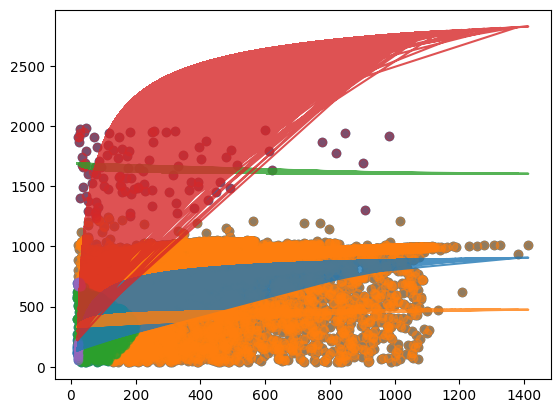

In [28]:
betas, SprimList = mxlreg(phi, y,4 , 0.98, 1, 1, 10)
plt.scatter(X, y)
for i in range(len(SprimList)):
    
    plt.scatter(X[SprimList[i]], y[SprimList[i]], alpha=0.5)
    plt.plot(X, phi * betas[i][1] + betas[i][0], alpha = 0.8)

